<a href="https://colab.research.google.com/github/jboverio/doing_data_science/blob/master/regression_to_the_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Galton's regression to the mean

Student with the highest score on the first exam:
First exam score: 101.23
Second exam score: 63.41


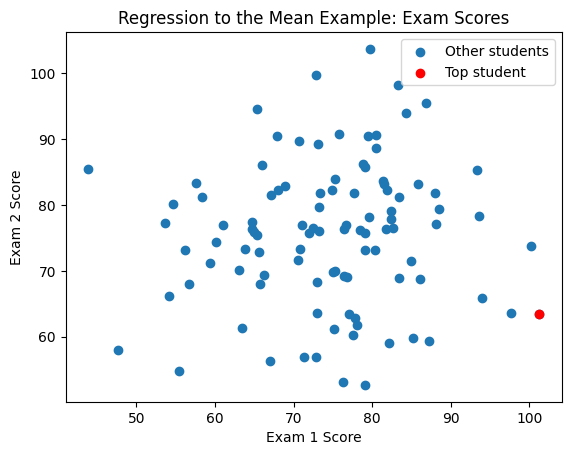

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_students = 100
num_exams = 2

# Generate random exam scores
true_scores = np.random.normal(loc=75, scale=10, size=(num_students, num_exams))
measurement_errors = np.random.normal(loc=0, scale=5, size=(num_students, num_exams))

# Add measurement errors to the true scores
observed_scores = true_scores + measurement_errors

# Find the index of the student with the highest score on the first exam
highest_score_idx = np.argmax(observed_scores[:, 0])

# Print the student's scores on both exams
print("Student with the highest score on the first exam:")
print(f"First exam score: {observed_scores[highest_score_idx, 0]:.2f}")
print(f"Second exam score: {observed_scores[highest_score_idx, 1]:.2f}")

# Plot the exam scores
plt.scatter(observed_scores[:, 0], observed_scores[:, 1], label="Other students")
plt.scatter(observed_scores[highest_score_idx, 0], observed_scores[highest_score_idx, 1], color="red", label="Top student")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Regression to the Mean Example: Exam Scores")
plt.show()


Student with the highest score on the first exam:
First exam score: 101.23
Second exam score: 63.41


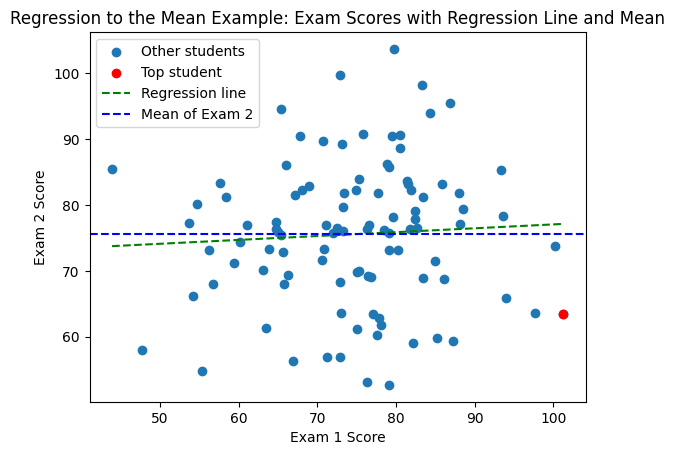

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_students = 100
num_exams = 2

# Generate random exam scores
true_scores = np.random.normal(loc=75, scale=10, size=(num_students, num_exams))
measurement_errors = np.random.normal(loc=0, scale=5, size=(num_students, num_exams))

# Add measurement errors to the true scores
observed_scores = true_scores + measurement_errors

# Find the index of the student with the highest score on the first exam
highest_score_idx = np.argmax(observed_scores[:, 0])

# Print the student's scores on both exams
print("Student with the highest score on the first exam:")
print(f"First exam score: {observed_scores[highest_score_idx, 0]:.2f}")
print(f"Second exam score: {observed_scores[highest_score_idx, 1]:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(observed_scores[:, 0], observed_scores[:, 1])

# Calculate regression line
regression_line_x = np.linspace(min(observed_scores[:, 0]), max(observed_scores[:, 0]), 100)
regression_line_y = intercept + slope * regression_line_x

# Plot the exam scores
plt.scatter(observed_scores[:, 0], observed_scores[:, 1], label="Other students")
plt.scatter(observed_scores[highest_score_idx, 0], observed_scores[highest_score_idx, 1], color="red", label="Top student")
plt.plot(regression_line_x, regression_line_y, color="green", linestyle="--", label="Regression line")
plt.axhline(y=np.mean(observed_scores[:, 1]), color="blue", linestyle="--", label="Mean of Exam 2")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Regression to the Mean Example: Exam Scores with Regression Line and Mean")
plt.show()
